In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")

import dataset, network, GPR_Model, prob_dist
import WGAN_Model

# Load data

In [2]:
scenario = "moons"
n_instance = 1000 # number of generated points
n_features = 2

if scenario in ("3d", "helix") :
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)

os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')
# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')
print('made dataset')
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j = 0#int(sys.argv[1])-1
print(vars[:,j])
n_features = 2
n_var =int(vars[0,j])
latent_spaces = [3,10,50,100]
latent_space = 3#int(latent_spaces[int(vars[1,j])])
batchs = [10,100,1000]
BATCH_SIZE = 100#int(batchs[int(vars[2,j])])
scales = ['-1-1','0-1']
scaled = '-1-1'#scales[int(vars[3,j])]
epochs = 5001   #[1000,10000,10000]
# epoch = int(epochs[int(vars[4,j])])
bias = [True,False]
use_bias = True#(bias[int(vars[5,j])])

made dataset
[2. 0. 0. 0. 0. 0.]


# WGAN

### Preprocessing

every time the data shape (100, 2)
every time the data shape (100, 2)
every time the data shape (100, 2)
every time the data shape (100, 2)
every time the data shape (100, 2)
every time the data shape (100, 2)
every time the data shape (100, 2)
every time the data shape (100, 2)
every time the data shape (100, 2)
every time the data shape (100, 2)
Epoch 0/5001
critic: 8.448450 - generator: -0.008019 - 3s
Epoch 1/5001
critic: 0.885278 - generator: -0.017399 - 0s
Epoch 2/5001
critic: 0.048761 - generator: -0.017361 - 0s
Epoch 3/5001
critic: 0.023402 - generator: -0.022824 - 0s
Epoch 4/5001
critic: 0.019579 - generator: -0.034933 - 1s
Epoch 5/5001
critic: 0.016155 - generator: -0.044314 - 0s
Epoch 6/5001
critic: 0.020459 - generator: -0.050364 - 0s
Epoch 7/5001
critic: 0.005884 - generator: -0.062946 - 0s
Epoch 8/5001
critic: 0.007104 - generator: -0.062083 - 0s
Epoch 9/5001
critic: 0.019367 - generator: -0.071106 - 0s
Epoch 10/5001
critic: 0.007446 - generator: -0.073976 - 0s
Epoch 11/50

critic: 0.027394 - generator: 0.033452 - 0s
Epoch 134/5001
critic: 0.021565 - generator: 0.031776 - 0s
Epoch 135/5001
critic: 0.029404 - generator: 0.042150 - 0s
Epoch 136/5001
critic: 0.018934 - generator: 0.038961 - 0s
Epoch 137/5001
critic: 0.021846 - generator: 0.038784 - 0s
Epoch 138/5001
critic: 0.024314 - generator: 0.041280 - 0s
Epoch 139/5001
critic: 0.033471 - generator: 0.040836 - 0s
Epoch 140/5001
critic: 0.030031 - generator: 0.039990 - 0s
Epoch 141/5001
critic: 0.017486 - generator: 0.033288 - 0s
Epoch 142/5001
critic: 0.032723 - generator: 0.041761 - 0s
Epoch 143/5001
critic: 0.019675 - generator: 0.034071 - 0s
Epoch 144/5001
critic: 0.029933 - generator: 0.035571 - 0s
Epoch 145/5001
critic: 0.036927 - generator: 0.034638 - 0s
Epoch 146/5001
critic: 0.023202 - generator: 0.030736 - 0s
Epoch 147/5001
critic: 0.019892 - generator: 0.032453 - 0s
Epoch 148/5001
critic: 0.020154 - generator: 0.030622 - 0s
Epoch 149/5001
critic: 0.031854 - generator: 0.034859 - 0s
Epoch 150/50

critic: 0.033946 - generator: 0.155041 - 0s
Epoch 273/5001
critic: 0.029291 - generator: 0.148743 - 0s
Epoch 274/5001
critic: 0.022034 - generator: 0.152195 - 0s
Epoch 275/5001
critic: 0.023039 - generator: 0.149981 - 0s
Epoch 276/5001
critic: 0.029127 - generator: 0.153263 - 0s
Epoch 277/5001
critic: 0.024087 - generator: 0.147685 - 0s
Epoch 278/5001
critic: 0.019997 - generator: 0.148257 - 0s
Epoch 279/5001
critic: 0.024465 - generator: 0.147684 - 0s
Epoch 280/5001
critic: 0.023929 - generator: 0.141532 - 0s
Epoch 281/5001
critic: 0.021430 - generator: 0.140715 - 0s
Epoch 282/5001
critic: 0.027647 - generator: 0.145629 - 0s
Epoch 283/5001
critic: 0.014665 - generator: 0.140336 - 0s
Epoch 284/5001
critic: 0.028225 - generator: 0.135682 - 0s
Epoch 285/5001
critic: 0.019702 - generator: 0.136675 - 0s
Epoch 286/5001
critic: 0.030179 - generator: 0.133628 - 0s
Epoch 287/5001
critic: 0.027967 - generator: 0.135621 - 0s
Epoch 288/5001
critic: 0.026596 - generator: 0.139562 - 0s
Epoch 289/50

critic: 0.021586 - generator: 0.242774 - 1s
Epoch 412/5001
critic: 0.016549 - generator: 0.238765 - 0s
Epoch 413/5001
critic: 0.019150 - generator: 0.243221 - 0s
Epoch 414/5001
critic: 0.020921 - generator: 0.247265 - 0s
Epoch 415/5001
critic: 0.023988 - generator: 0.247573 - 1s
Epoch 416/5001
critic: 0.024309 - generator: 0.249997 - 0s
Epoch 417/5001
critic: 0.015983 - generator: 0.244348 - 0s
Epoch 418/5001
critic: 0.015819 - generator: 0.251830 - 0s
Epoch 419/5001
critic: 0.021397 - generator: 0.253495 - 0s
Epoch 420/5001
critic: 0.020859 - generator: 0.243680 - 0s
Epoch 421/5001
critic: 0.025020 - generator: 0.246651 - 1s
Epoch 422/5001
critic: 0.025122 - generator: 0.251748 - 0s
Epoch 423/5001
critic: 0.020552 - generator: 0.243523 - 0s
Epoch 424/5001
critic: 0.021093 - generator: 0.253185 - 0s
Epoch 425/5001
critic: 0.020430 - generator: 0.255028 - 0s
Epoch 426/5001
critic: 0.028783 - generator: 0.255145 - 0s
Epoch 427/5001
critic: 0.015427 - generator: 0.248129 - 0s
Epoch 428/50

critic: 0.026614 - generator: 0.288648 - 0s
Epoch 551/5001
critic: 0.014420 - generator: 0.285989 - 0s
Epoch 552/5001
critic: 0.015778 - generator: 0.296231 - 0s
Epoch 553/5001
critic: 0.023378 - generator: 0.300019 - 0s
Epoch 554/5001
critic: 0.023567 - generator: 0.295507 - 0s
Epoch 555/5001
critic: 0.022285 - generator: 0.296039 - 0s
Epoch 556/5001
critic: 0.019850 - generator: 0.295733 - 0s
Epoch 557/5001
critic: 0.019973 - generator: 0.292252 - 0s
Epoch 558/5001
critic: 0.019257 - generator: 0.289215 - 0s
Epoch 559/5001
critic: 0.024045 - generator: 0.294355 - 0s
Epoch 560/5001
critic: 0.024538 - generator: 0.288437 - 0s
Epoch 561/5001
critic: 0.019226 - generator: 0.290207 - 0s
Epoch 562/5001
critic: 0.021098 - generator: 0.298145 - 0s
Epoch 563/5001
critic: 0.022796 - generator: 0.298883 - 0s
Epoch 564/5001
critic: 0.013395 - generator: 0.295120 - 0s
Epoch 565/5001
critic: 0.020486 - generator: 0.300708 - 0s
Epoch 566/5001
critic: 0.016333 - generator: 0.299919 - 0s
Epoch 567/50

critic: 0.018753 - generator: 0.326097 - 0s
Epoch 690/5001
critic: 0.025206 - generator: 0.336638 - 0s
Epoch 691/5001
critic: 0.015894 - generator: 0.336430 - 0s
Epoch 692/5001
critic: 0.014110 - generator: 0.344389 - 0s
Epoch 693/5001
critic: 0.012976 - generator: 0.348925 - 0s
Epoch 694/5001
critic: 0.020351 - generator: 0.329615 - 0s
Epoch 695/5001
critic: 0.021428 - generator: 0.328822 - 0s
Epoch 696/5001
critic: 0.022932 - generator: 0.342378 - 0s
Epoch 697/5001
critic: 0.013243 - generator: 0.331173 - 0s
Epoch 698/5001
critic: 0.020940 - generator: 0.334513 - 0s
Epoch 699/5001
critic: 0.012503 - generator: 0.337398 - 0s
Epoch 700/5001
critic: 0.020133 - generator: 0.336294 - 0s
Epoch 701/5001
critic: 0.021475 - generator: 0.331160 - 0s
Epoch 702/5001
critic: 0.016016 - generator: 0.338408 - 0s
Epoch 703/5001
critic: 0.011587 - generator: 0.329182 - 0s
Epoch 704/5001
critic: 0.016091 - generator: 0.334774 - 0s
Epoch 705/5001
critic: 0.019510 - generator: 0.329399 - 0s
Epoch 706/50

critic: 0.019765 - generator: 0.351009 - 0s
Epoch 829/5001
critic: 0.018133 - generator: 0.352469 - 0s
Epoch 830/5001
critic: 0.016488 - generator: 0.350418 - 0s
Epoch 831/5001
critic: 0.017613 - generator: 0.342474 - 0s
Epoch 832/5001
critic: 0.015206 - generator: 0.356976 - 0s
Epoch 833/5001
critic: 0.016877 - generator: 0.349678 - 0s
Epoch 834/5001
critic: 0.016060 - generator: 0.350287 - 0s
Epoch 835/5001
critic: 0.019664 - generator: 0.351560 - 0s
Epoch 836/5001
critic: 0.017101 - generator: 0.356706 - 0s
Epoch 837/5001
critic: 0.018326 - generator: 0.353789 - 0s
Epoch 838/5001
critic: 0.016789 - generator: 0.355462 - 0s
Epoch 839/5001
critic: 0.014610 - generator: 0.358262 - 0s
Epoch 840/5001
critic: 0.020083 - generator: 0.358159 - 0s
Epoch 841/5001
critic: 0.012204 - generator: 0.356501 - 0s
Epoch 842/5001
critic: 0.015302 - generator: 0.356516 - 0s
Epoch 843/5001
critic: 0.020033 - generator: 0.362005 - 0s
Epoch 844/5001
critic: 0.015952 - generator: 0.356722 - 0s
Epoch 845/50

critic: 0.019340 - generator: 0.359888 - 0s
Epoch 968/5001
critic: 0.012827 - generator: 0.355928 - 0s
Epoch 969/5001
critic: 0.015560 - generator: 0.359377 - 0s
Epoch 970/5001
critic: 0.014699 - generator: 0.357953 - 0s
Epoch 971/5001
critic: 0.010655 - generator: 0.358890 - 0s
Epoch 972/5001
critic: 0.014891 - generator: 0.362101 - 0s
Epoch 973/5001
critic: 0.011782 - generator: 0.358369 - 0s
Epoch 974/5001
critic: 0.010097 - generator: 0.349025 - 0s
Epoch 975/5001
critic: 0.022737 - generator: 0.365484 - 0s
Epoch 976/5001
critic: 0.015047 - generator: 0.350944 - 0s
Epoch 977/5001
critic: 0.022489 - generator: 0.349649 - 0s
Epoch 978/5001
critic: 0.013868 - generator: 0.360063 - 0s
Epoch 979/5001
critic: 0.015185 - generator: 0.353709 - 0s
Epoch 980/5001
critic: 0.015990 - generator: 0.350047 - 0s
Epoch 981/5001
critic: 0.018955 - generator: 0.350877 - 0s
Epoch 982/5001
critic: 0.016368 - generator: 0.351669 - 0s
Epoch 983/5001
critic: 0.017433 - generator: 0.355972 - 0s
Epoch 984/50

critic: 0.020406 - generator: 0.286365 - 0s
Epoch 1106/5001
critic: 0.011709 - generator: 0.285416 - 1s
Epoch 1107/5001
critic: 0.012861 - generator: 0.282479 - 0s
Epoch 1108/5001
critic: 0.012582 - generator: 0.285403 - 0s
Epoch 1109/5001
critic: 0.014418 - generator: 0.287423 - 1s
Epoch 1110/5001
critic: 0.009231 - generator: 0.290094 - 1s
Epoch 1111/5001
critic: 0.018456 - generator: 0.291565 - 1s
Epoch 1112/5001
critic: 0.016867 - generator: 0.286740 - 1s
Epoch 1113/5001
critic: 0.013281 - generator: 0.281238 - 0s
Epoch 1114/5001
critic: 0.017232 - generator: 0.287186 - 0s
Epoch 1115/5001
critic: 0.016445 - generator: 0.291610 - 1s
Epoch 1116/5001
critic: 0.013294 - generator: 0.283944 - 0s
Epoch 1117/5001
critic: 0.017026 - generator: 0.285159 - 1s
Epoch 1118/5001
critic: 0.013014 - generator: 0.284346 - 1s
Epoch 1119/5001
critic: 0.012706 - generator: 0.282688 - 1s
Epoch 1120/5001
critic: 0.010128 - generator: 0.282663 - 0s
Epoch 1121/5001
critic: 0.014130 - generator: 0.283322 -

critic: 0.012898 - generator: 0.291350 - 0s
Epoch 1243/5001
critic: 0.011973 - generator: 0.293731 - 0s
Epoch 1244/5001
critic: 0.013314 - generator: 0.298000 - 0s
Epoch 1245/5001
critic: 0.009967 - generator: 0.291882 - 0s
Epoch 1246/5001
critic: 0.015333 - generator: 0.291715 - 0s
Epoch 1247/5001
critic: 0.012757 - generator: 0.292992 - 0s
Epoch 1248/5001
critic: 0.010971 - generator: 0.296981 - 0s
Epoch 1249/5001
critic: 0.005989 - generator: 0.292189 - 0s
Epoch 1250/5001
critic: 0.011798 - generator: 0.301068 - 0s
Epoch 1251/5001
critic: 0.016242 - generator: 0.297818 - 0s
Epoch 1252/5001
critic: 0.014213 - generator: 0.290430 - 1s
Epoch 1253/5001
critic: 0.008105 - generator: 0.305061 - 0s
Epoch 1254/5001
critic: 0.006901 - generator: 0.293168 - 1s
Epoch 1255/5001
critic: 0.018676 - generator: 0.289910 - 0s
Epoch 1256/5001
critic: 0.013556 - generator: 0.300600 - 0s
Epoch 1257/5001
critic: 0.015282 - generator: 0.297744 - 0s
Epoch 1258/5001
critic: 0.015350 - generator: 0.290686 -

critic: 0.007343 - generator: 0.269926 - 0s
Epoch 1380/5001
critic: 0.008719 - generator: 0.272768 - 0s
Epoch 1381/5001
critic: 0.015159 - generator: 0.282709 - 0s
Epoch 1382/5001
critic: 0.009459 - generator: 0.273002 - 0s
Epoch 1383/5001
critic: 0.009931 - generator: 0.285060 - 0s
Epoch 1384/5001
critic: 0.011894 - generator: 0.268816 - 0s
Epoch 1385/5001
critic: 0.010288 - generator: 0.276034 - 0s
Epoch 1386/5001
critic: 0.023063 - generator: 0.273425 - 0s
Epoch 1387/5001
critic: 0.010511 - generator: 0.274936 - 0s
Epoch 1388/5001
critic: 0.008271 - generator: 0.278920 - 0s
Epoch 1389/5001
critic: 0.012416 - generator: 0.281720 - 0s
Epoch 1390/5001
critic: 0.010283 - generator: 0.279473 - 0s
Epoch 1391/5001
critic: 0.016144 - generator: 0.273393 - 0s
Epoch 1392/5001
critic: 0.010448 - generator: 0.264691 - 0s
Epoch 1393/5001
critic: 0.018350 - generator: 0.270794 - 0s
Epoch 1394/5001
critic: 0.013178 - generator: 0.269513 - 0s
Epoch 1395/5001
critic: 0.016836 - generator: 0.270223 -

critic: 0.008105 - generator: 0.259744 - 0s
Epoch 1517/5001
critic: 0.014070 - generator: 0.261181 - 0s
Epoch 1518/5001
critic: 0.012831 - generator: 0.266320 - 0s
Epoch 1519/5001
critic: 0.008944 - generator: 0.255439 - 0s
Epoch 1520/5001
critic: 0.010854 - generator: 0.259346 - 0s
Epoch 1521/5001
critic: 0.014005 - generator: 0.240365 - 0s
Epoch 1522/5001
critic: 0.009588 - generator: 0.254495 - 0s
Epoch 1523/5001
critic: 0.012622 - generator: 0.246788 - 0s
Epoch 1524/5001
critic: 0.014936 - generator: 0.250629 - 0s
Epoch 1525/5001
critic: 0.012703 - generator: 0.254134 - 0s
Epoch 1526/5001
critic: 0.008424 - generator: 0.236861 - 0s
Epoch 1527/5001
critic: 0.008311 - generator: 0.244302 - 1s
Epoch 1528/5001
critic: 0.010459 - generator: 0.243132 - 0s
Epoch 1529/5001
critic: 0.014779 - generator: 0.250623 - 0s
Epoch 1530/5001
critic: 0.009369 - generator: 0.251486 - 0s
Epoch 1531/5001
critic: 0.009742 - generator: 0.248272 - 0s
Epoch 1532/5001
critic: 0.014003 - generator: 0.262172 -

critic: 0.011457 - generator: 0.283196 - 0s
Epoch 1654/5001
critic: 0.015173 - generator: 0.269873 - 0s
Epoch 1655/5001
critic: 0.013248 - generator: 0.272573 - 0s
Epoch 1656/5001
critic: 0.010035 - generator: 0.268005 - 0s
Epoch 1657/5001
critic: 0.003969 - generator: 0.273972 - 0s
Epoch 1658/5001
critic: 0.008764 - generator: 0.277525 - 0s
Epoch 1659/5001
critic: 0.014983 - generator: 0.280643 - 0s
Epoch 1660/5001
critic: 0.017122 - generator: 0.270723 - 0s
Epoch 1661/5001
critic: 0.014788 - generator: 0.276253 - 0s
Epoch 1662/5001
critic: 0.011029 - generator: 0.283622 - 0s
Epoch 1663/5001
critic: 0.015784 - generator: 0.272754 - 0s
Epoch 1664/5001
critic: 0.013253 - generator: 0.267961 - 0s
Epoch 1665/5001
critic: 0.013775 - generator: 0.278662 - 0s
Epoch 1666/5001
critic: 0.012838 - generator: 0.276202 - 0s
Epoch 1667/5001
critic: 0.018055 - generator: 0.271864 - 0s
Epoch 1668/5001
critic: 0.015076 - generator: 0.274445 - 0s
Epoch 1669/5001
critic: 0.007489 - generator: 0.281280 -

critic: 0.012477 - generator: 0.251035 - 0s
Epoch 1791/5001
critic: 0.013016 - generator: 0.256036 - 0s
Epoch 1792/5001
critic: 0.015691 - generator: 0.254786 - 0s
Epoch 1793/5001
critic: 0.016624 - generator: 0.252438 - 0s
Epoch 1794/5001
critic: 0.006981 - generator: 0.250239 - 0s
Epoch 1795/5001
critic: 0.012746 - generator: 0.255981 - 0s
Epoch 1796/5001
critic: 0.013865 - generator: 0.257750 - 0s
Epoch 1797/5001
critic: 0.010332 - generator: 0.260368 - 0s
Epoch 1798/5001
critic: 0.010831 - generator: 0.262028 - 0s
Epoch 1799/5001
critic: 0.008279 - generator: 0.254674 - 0s
Epoch 1800/5001
critic: 0.014168 - generator: 0.253561 - 0s
Epoch 1801/5001
critic: 0.010975 - generator: 0.254023 - 0s
Epoch 1802/5001
critic: 0.010314 - generator: 0.252336 - 0s
Epoch 1803/5001
critic: 0.015084 - generator: 0.251621 - 1s
Epoch 1804/5001
critic: 0.011228 - generator: 0.257038 - 0s
Epoch 1805/5001
critic: 0.012134 - generator: 0.246790 - 0s
Epoch 1806/5001
critic: 0.010107 - generator: 0.250474 -

critic: 0.012456 - generator: 0.211318 - 0s
Epoch 1928/5001
critic: 0.016330 - generator: 0.207353 - 1s
Epoch 1929/5001
critic: 0.005853 - generator: 0.206370 - 0s
Epoch 1930/5001
critic: 0.014206 - generator: 0.200272 - 0s
Epoch 1931/5001
critic: 0.010564 - generator: 0.206017 - 0s
Epoch 1932/5001
critic: 0.010945 - generator: 0.202767 - 0s
Epoch 1933/5001
critic: 0.009347 - generator: 0.204400 - 0s
Epoch 1934/5001
critic: 0.012527 - generator: 0.197843 - 0s
Epoch 1935/5001
critic: 0.016147 - generator: 0.200292 - 0s
Epoch 1936/5001
critic: 0.012074 - generator: 0.202489 - 0s
Epoch 1937/5001
critic: 0.007775 - generator: 0.211236 - 0s
Epoch 1938/5001
critic: 0.013490 - generator: 0.202926 - 0s
Epoch 1939/5001
critic: 0.009118 - generator: 0.196884 - 1s
Epoch 1940/5001
critic: 0.011185 - generator: 0.204349 - 0s
Epoch 1941/5001
critic: 0.013254 - generator: 0.194111 - 0s
Epoch 1942/5001
critic: 0.018430 - generator: 0.197470 - 0s
Epoch 1943/5001
critic: 0.008704 - generator: 0.194671 -

critic: 0.006835 - generator: 0.184939 - 0s
Epoch 2065/5001
critic: 0.011325 - generator: 0.186130 - 0s
Epoch 2066/5001
critic: 0.013069 - generator: 0.179214 - 0s
Epoch 2067/5001
critic: 0.005704 - generator: 0.179550 - 0s
Epoch 2068/5001
critic: 0.006166 - generator: 0.187605 - 0s
Epoch 2069/5001
critic: 0.006829 - generator: 0.184139 - 0s
Epoch 2070/5001
critic: 0.007307 - generator: 0.184631 - 0s
Epoch 2071/5001
critic: 0.013996 - generator: 0.190140 - 0s
Epoch 2072/5001
critic: 0.009246 - generator: 0.189827 - 0s
Epoch 2073/5001
critic: 0.018199 - generator: 0.185625 - 0s
Epoch 2074/5001
critic: 0.015267 - generator: 0.188837 - 0s
Epoch 2075/5001
critic: 0.007731 - generator: 0.192911 - 0s
Epoch 2076/5001
critic: 0.010412 - generator: 0.183695 - 0s
Epoch 2077/5001
critic: 0.011918 - generator: 0.191093 - 1s
Epoch 2078/5001
critic: 0.014120 - generator: 0.181164 - 0s
Epoch 2079/5001
critic: 0.012932 - generator: 0.182212 - 0s
Epoch 2080/5001
critic: 0.009981 - generator: 0.191114 -

critic: 0.007408 - generator: 0.145241 - 0s
Epoch 2202/5001
critic: 0.015042 - generator: 0.146027 - 0s
Epoch 2203/5001
critic: 0.008340 - generator: 0.145170 - 0s
Epoch 2204/5001
critic: 0.014981 - generator: 0.138340 - 0s
Epoch 2205/5001
critic: 0.014162 - generator: 0.143865 - 0s
Epoch 2206/5001
critic: 0.010211 - generator: 0.140582 - 0s
Epoch 2207/5001
critic: 0.011768 - generator: 0.149000 - 0s
Epoch 2208/5001
critic: 0.010763 - generator: 0.140592 - 0s
Epoch 2209/5001
critic: 0.007562 - generator: 0.143058 - 0s
Epoch 2210/5001
critic: 0.007796 - generator: 0.146179 - 0s
Epoch 2211/5001
critic: 0.008593 - generator: 0.149071 - 0s
Epoch 2212/5001
critic: 0.007558 - generator: 0.134952 - 0s
Epoch 2213/5001
critic: 0.007933 - generator: 0.145587 - 0s
Epoch 2214/5001
critic: 0.010402 - generator: 0.137150 - 0s
Epoch 2215/5001
critic: 0.015136 - generator: 0.142536 - 0s
Epoch 2216/5001
critic: 0.009704 - generator: 0.149361 - 0s
Epoch 2217/5001
critic: 0.012926 - generator: 0.136679 -

critic: 0.007826 - generator: 0.085430 - 0s
Epoch 2339/5001
critic: 0.013161 - generator: 0.092467 - 0s
Epoch 2340/5001
critic: 0.005524 - generator: 0.082564 - 0s
Epoch 2341/5001
critic: 0.010968 - generator: 0.084545 - 0s
Epoch 2342/5001
critic: 0.012219 - generator: 0.087424 - 0s
Epoch 2343/5001
critic: 0.011373 - generator: 0.089220 - 0s
Epoch 2344/5001
critic: 0.011536 - generator: 0.092176 - 0s
Epoch 2345/5001
critic: 0.012534 - generator: 0.090115 - 0s
Epoch 2346/5001
critic: 0.010627 - generator: 0.091232 - 0s
Epoch 2347/5001
critic: 0.014515 - generator: 0.083686 - 0s
Epoch 2348/5001
critic: 0.007049 - generator: 0.081036 - 1s
Epoch 2349/5001
critic: 0.004643 - generator: 0.084363 - 0s
Epoch 2350/5001
critic: 0.011604 - generator: 0.090216 - 0s
Epoch 2351/5001
critic: 0.007284 - generator: 0.086321 - 0s
Epoch 2352/5001
critic: 0.012941 - generator: 0.092308 - 0s
Epoch 2353/5001
critic: 0.010109 - generator: 0.086678 - 0s
Epoch 2354/5001
critic: 0.007334 - generator: 0.092299 -

critic: 0.012766 - generator: 0.101622 - 0s
Epoch 2476/5001
critic: 0.005371 - generator: 0.086773 - 0s
Epoch 2477/5001
critic: 0.009420 - generator: 0.099124 - 0s
Epoch 2478/5001
critic: 0.005772 - generator: 0.088619 - 0s
Epoch 2479/5001
critic: 0.009004 - generator: 0.093695 - 0s
Epoch 2480/5001
critic: 0.010799 - generator: 0.101477 - 0s
Epoch 2481/5001
critic: 0.004667 - generator: 0.090425 - 0s
Epoch 2482/5001
critic: 0.008196 - generator: 0.093770 - 0s
Epoch 2483/5001
critic: 0.017451 - generator: 0.101521 - 0s
Epoch 2484/5001
critic: 0.017025 - generator: 0.090105 - 0s
Epoch 2485/5001
critic: 0.007165 - generator: 0.088417 - 0s
Epoch 2486/5001
critic: 0.008864 - generator: 0.092646 - 0s
Epoch 2487/5001
critic: 0.008724 - generator: 0.091146 - 0s
Epoch 2488/5001
critic: 0.007384 - generator: 0.092423 - 0s
Epoch 2489/5001
critic: 0.010863 - generator: 0.097825 - 0s
Epoch 2490/5001
critic: 0.010420 - generator: 0.097650 - 0s
Epoch 2491/5001
critic: 0.014631 - generator: 0.085677 -

critic: 0.008644 - generator: 0.094187 - 0s
Epoch 2613/5001
critic: 0.009859 - generator: 0.090254 - 0s
Epoch 2614/5001
critic: 0.010199 - generator: 0.087412 - 0s
Epoch 2615/5001
critic: 0.010354 - generator: 0.095049 - 0s
Epoch 2616/5001
critic: 0.002118 - generator: 0.093273 - 0s
Epoch 2617/5001
critic: 0.012421 - generator: 0.088429 - 0s
Epoch 2618/5001
critic: 0.007808 - generator: 0.090901 - 0s
Epoch 2619/5001
critic: 0.005851 - generator: 0.098110 - 0s
Epoch 2620/5001
critic: 0.012382 - generator: 0.084570 - 0s
Epoch 2621/5001
critic: 0.009313 - generator: 0.087006 - 0s
Epoch 2622/5001
critic: 0.010562 - generator: 0.086778 - 1s
Epoch 2623/5001
critic: 0.007500 - generator: 0.096506 - 0s
Epoch 2624/5001
critic: 0.007451 - generator: 0.086801 - 0s
Epoch 2625/5001
critic: 0.010076 - generator: 0.089611 - 1s
Epoch 2626/5001
critic: 0.008753 - generator: 0.097649 - 0s
Epoch 2627/5001
critic: 0.011001 - generator: 0.086548 - 0s
Epoch 2628/5001
critic: 0.007156 - generator: 0.092796 -

critic: 0.011268 - generator: 0.100736 - 0s
Epoch 2750/5001
critic: 0.014477 - generator: 0.100827 - 0s
Epoch 2751/5001
critic: 0.007605 - generator: 0.096849 - 0s
Epoch 2752/5001
critic: 0.009804 - generator: 0.090554 - 0s
Epoch 2753/5001
critic: 0.012760 - generator: 0.099270 - 0s
Epoch 2754/5001
critic: 0.003425 - generator: 0.102768 - 0s
Epoch 2755/5001
critic: 0.005144 - generator: 0.108954 - 0s
Epoch 2756/5001
critic: 0.004852 - generator: 0.105112 - 0s
Epoch 2757/5001
critic: 0.014463 - generator: 0.112952 - 0s
Epoch 2758/5001
critic: 0.012734 - generator: 0.116354 - 0s
Epoch 2759/5001
critic: 0.010945 - generator: 0.117555 - 0s
Epoch 2760/5001
critic: 0.002290 - generator: 0.115576 - 0s
Epoch 2761/5001
critic: 0.003867 - generator: 0.116388 - 0s
Epoch 2762/5001
critic: 0.007887 - generator: 0.123668 - 0s
Epoch 2763/5001
critic: 0.003408 - generator: 0.121779 - 0s
Epoch 2764/5001
critic: 0.009520 - generator: 0.110321 - 0s
Epoch 2765/5001
critic: 0.005679 - generator: 0.113456 -

critic: 0.010398 - generator: 0.071687 - 0s
Epoch 2887/5001
critic: 0.011189 - generator: 0.077401 - 0s
Epoch 2888/5001
critic: 0.006939 - generator: 0.076181 - 0s
Epoch 2889/5001
critic: 0.008122 - generator: 0.076439 - 0s
Epoch 2890/5001
critic: 0.007450 - generator: 0.073946 - 0s
Epoch 2891/5001
critic: 0.009790 - generator: 0.067134 - 0s
Epoch 2892/5001
critic: 0.014869 - generator: 0.067619 - 0s
Epoch 2893/5001
critic: 0.009633 - generator: 0.069201 - 0s
Epoch 2894/5001
critic: 0.008666 - generator: 0.075044 - 0s
Epoch 2895/5001
critic: 0.007968 - generator: 0.070993 - 0s
Epoch 2896/5001
critic: 0.005971 - generator: 0.075782 - 0s
Epoch 2897/5001
critic: 0.011372 - generator: 0.073177 - 0s
Epoch 2898/5001
critic: 0.011327 - generator: 0.059745 - 0s
Epoch 2899/5001
critic: 0.007553 - generator: 0.075672 - 0s
Epoch 2900/5001
critic: 0.011622 - generator: 0.080230 - 0s
Epoch 2901/5001
critic: 0.013383 - generator: 0.070805 - 0s
Epoch 2902/5001
critic: 0.008635 - generator: 0.057436 -

critic: 0.008444 - generator: 0.040816 - 1s
Epoch 3024/5001
critic: 0.010247 - generator: 0.048652 - 0s
Epoch 3025/5001
critic: 0.006898 - generator: 0.038241 - 0s
Epoch 3026/5001
critic: 0.011504 - generator: 0.036717 - 0s
Epoch 3027/5001
critic: 0.003757 - generator: 0.037743 - 1s
Epoch 3028/5001
critic: 0.003231 - generator: 0.034179 - 0s
Epoch 3029/5001
critic: 0.007253 - generator: 0.045490 - 0s
Epoch 3030/5001
critic: 0.009171 - generator: 0.040889 - 0s
Epoch 3031/5001
critic: 0.013052 - generator: 0.040980 - 0s
Epoch 3032/5001
critic: 0.006839 - generator: 0.049461 - 0s
Epoch 3033/5001
critic: 0.011402 - generator: 0.047307 - 0s
Epoch 3034/5001
critic: 0.006740 - generator: 0.048421 - 0s
Epoch 3035/5001
critic: 0.009123 - generator: 0.043406 - 0s
Epoch 3036/5001
critic: 0.007472 - generator: 0.046297 - 0s
Epoch 3037/5001
critic: 0.009505 - generator: 0.043250 - 0s
Epoch 3038/5001
critic: 0.007032 - generator: 0.052905 - 0s
Epoch 3039/5001
critic: 0.008654 - generator: 0.043849 -

critic: 0.006828 - generator: 0.018494 - 0s
Epoch 3161/5001
critic: 0.009236 - generator: 0.025155 - 0s
Epoch 3162/5001
critic: 0.006914 - generator: 0.019751 - 0s
Epoch 3163/5001
critic: 0.011380 - generator: 0.021848 - 0s
Epoch 3164/5001
critic: 0.004776 - generator: 0.024706 - 0s
Epoch 3165/5001
critic: 0.010714 - generator: 0.020987 - 0s
Epoch 3166/5001
critic: 0.006196 - generator: 0.021151 - 0s
Epoch 3167/5001
critic: 0.002319 - generator: 0.024898 - 0s
Epoch 3168/5001
critic: 0.006945 - generator: 0.025304 - 0s
Epoch 3169/5001
critic: 0.007084 - generator: 0.029681 - 1s
Epoch 3170/5001
critic: 0.008782 - generator: 0.024968 - 0s
Epoch 3171/5001
critic: 0.006105 - generator: 0.020906 - 0s
Epoch 3172/5001
critic: 0.006465 - generator: 0.018749 - 1s
Epoch 3173/5001
critic: 0.003329 - generator: 0.015842 - 0s
Epoch 3174/5001
critic: 0.009791 - generator: 0.022756 - 0s
Epoch 3175/5001
critic: 0.008054 - generator: 0.021828 - 0s
Epoch 3176/5001
critic: 0.009351 - generator: 0.015738 -

critic: 0.009259 - generator: 0.045252 - 0s
Epoch 3298/5001
critic: 0.008274 - generator: 0.053370 - 0s
Epoch 3299/5001
critic: 0.004009 - generator: 0.042922 - 0s
Epoch 3300/5001
critic: 0.010181 - generator: 0.054257 - 0s
Epoch 3301/5001
critic: 0.009501 - generator: 0.047328 - 0s
Epoch 3302/5001
critic: 0.007330 - generator: 0.056459 - 0s
Epoch 3303/5001
critic: 0.008203 - generator: 0.051258 - 0s
Epoch 3304/5001
critic: 0.005051 - generator: 0.060991 - 0s
Epoch 3305/5001
critic: 0.006342 - generator: 0.047667 - 0s
Epoch 3306/5001
critic: 0.005573 - generator: 0.042370 - 0s
Epoch 3307/5001
critic: 0.009551 - generator: 0.053386 - 0s
Epoch 3308/5001
critic: 0.004417 - generator: 0.043802 - 0s
Epoch 3309/5001
critic: 0.006173 - generator: 0.047396 - 0s
Epoch 3310/5001
critic: 0.007504 - generator: 0.046485 - 0s
Epoch 3311/5001
critic: 0.003117 - generator: 0.051882 - 0s
Epoch 3312/5001
critic: 0.011812 - generator: 0.061244 - 0s
Epoch 3313/5001
critic: 0.007835 - generator: 0.055866 -

critic: 0.010389 - generator: 0.041700 - 0s
Epoch 3435/5001
critic: -0.000848 - generator: 0.045254 - 0s
Epoch 3436/5001
critic: 0.011530 - generator: 0.029857 - 0s
Epoch 3437/5001
critic: 0.008328 - generator: 0.043312 - 0s
Epoch 3438/5001
critic: 0.005914 - generator: 0.043696 - 0s
Epoch 3439/5001
critic: 0.011005 - generator: 0.034651 - 0s
Epoch 3440/5001
critic: 0.011415 - generator: 0.041212 - 0s
Epoch 3441/5001
critic: 0.002339 - generator: 0.034493 - 0s
Epoch 3442/5001
critic: 0.014326 - generator: 0.049203 - 0s
Epoch 3443/5001
critic: 0.004951 - generator: 0.035607 - 1s
Epoch 3444/5001
critic: 0.003927 - generator: 0.033242 - 0s
Epoch 3445/5001
critic: 0.006932 - generator: 0.041564 - 0s
Epoch 3446/5001
critic: 0.004493 - generator: 0.043414 - 1s
Epoch 3447/5001
critic: 0.008515 - generator: 0.042193 - 0s
Epoch 3448/5001
critic: 0.008384 - generator: 0.038305 - 0s
Epoch 3449/5001
critic: 0.007558 - generator: 0.029461 - 0s
Epoch 3450/5001
critic: 0.010759 - generator: 0.031138 

critic: 0.006827 - generator: 0.029892 - 0s
Epoch 3572/5001
critic: 0.004424 - generator: 0.022979 - 0s
Epoch 3573/5001
critic: 0.009008 - generator: 0.022537 - 0s
Epoch 3574/5001
critic: 0.007850 - generator: 0.024880 - 0s
Epoch 3575/5001
critic: 0.006485 - generator: 0.013503 - 0s
Epoch 3576/5001
critic: 0.010188 - generator: 0.016673 - 0s
Epoch 3577/5001
critic: 0.012541 - generator: 0.017287 - 0s
Epoch 3578/5001
critic: 0.005413 - generator: 0.022282 - 0s
Epoch 3579/5001
critic: 0.004905 - generator: 0.022095 - 0s
Epoch 3580/5001
critic: 0.007860 - generator: 0.014572 - 0s
Epoch 3581/5001
critic: 0.008455 - generator: 0.019286 - 0s
Epoch 3582/5001
critic: 0.006440 - generator: 0.013391 - 0s
Epoch 3583/5001
critic: 0.008911 - generator: 0.025925 - 0s
Epoch 3584/5001
critic: 0.009929 - generator: 0.030219 - 0s
Epoch 3585/5001
critic: 0.007679 - generator: 0.020527 - 0s
Epoch 3586/5001
critic: 0.010113 - generator: 0.022271 - 0s
Epoch 3587/5001
critic: 0.008371 - generator: 0.016372 -

critic: 0.003336 - generator: 0.001002 - 0s
Epoch 3708/5001
critic: 0.000759 - generator: -0.008907 - 0s
Epoch 3709/5001
critic: 0.001714 - generator: -0.006837 - 0s
Epoch 3710/5001
critic: 0.006193 - generator: -0.004573 - 1s
Epoch 3711/5001
critic: 0.008954 - generator: -0.000726 - 0s
Epoch 3712/5001
critic: 0.006534 - generator: 0.001524 - 0s
Epoch 3713/5001
critic: 0.003773 - generator: -0.005338 - 0s
Epoch 3714/5001
critic: 0.005003 - generator: -0.000598 - 0s
Epoch 3715/5001
critic: 0.010204 - generator: 0.001656 - 0s
Epoch 3716/5001
critic: 0.011400 - generator: -0.009540 - 1s
Epoch 3717/5001
critic: 0.009381 - generator: 0.002452 - 0s
Epoch 3718/5001
critic: 0.010907 - generator: -0.012269 - 0s
Epoch 3719/5001
critic: 0.011003 - generator: -0.013897 - 1s
Epoch 3720/5001
critic: 0.004963 - generator: -0.010194 - 0s
Epoch 3721/5001
critic: 0.004179 - generator: -0.014389 - 0s
Epoch 3722/5001
critic: 0.008062 - generator: -0.008969 - 0s
Epoch 3723/5001
critic: 0.011588 - generator

critic: 0.003933 - generator: 0.036893 - 0s
Epoch 3844/5001
critic: 0.006451 - generator: 0.027242 - 0s
Epoch 3845/5001
critic: 0.011845 - generator: 0.024719 - 0s
Epoch 3846/5001
critic: 0.003810 - generator: 0.029518 - 0s
Epoch 3847/5001
critic: 0.007059 - generator: 0.036296 - 0s
Epoch 3848/5001
critic: 0.007604 - generator: 0.038467 - 0s
Epoch 3849/5001
critic: -0.000078 - generator: 0.041528 - 0s
Epoch 3850/5001
critic: 0.001623 - generator: 0.030600 - 0s
Epoch 3851/5001
critic: 0.007791 - generator: 0.036782 - 0s
Epoch 3852/5001
critic: 0.008723 - generator: 0.034668 - 0s
Epoch 3853/5001
critic: 0.002581 - generator: 0.042571 - 0s
Epoch 3854/5001
critic: 0.010412 - generator: 0.027787 - 0s
Epoch 3855/5001
critic: 0.004124 - generator: 0.038193 - 0s
Epoch 3856/5001
critic: 0.007784 - generator: 0.035386 - 0s
Epoch 3857/5001
critic: 0.006774 - generator: 0.034086 - 0s
Epoch 3858/5001
critic: 0.011325 - generator: 0.034332 - 0s
Epoch 3859/5001
critic: 0.006616 - generator: 0.032257 

critic: 0.005154 - generator: -0.003847 - 0s
Epoch 3981/5001
critic: 0.005983 - generator: 0.010125 - 0s
Epoch 3982/5001
critic: 0.003338 - generator: 0.000533 - 0s
Epoch 3983/5001
critic: 0.007436 - generator: 0.001364 - 0s
Epoch 3984/5001
critic: 0.006477 - generator: -0.010650 - 0s
Epoch 3985/5001
critic: 0.006454 - generator: 0.003635 - 0s
Epoch 3986/5001
critic: 0.008842 - generator: -0.001125 - 0s
Epoch 3987/5001
critic: 0.002612 - generator: -0.003830 - 0s
Epoch 3988/5001
critic: 0.013382 - generator: -0.001560 - 0s
Epoch 3989/5001
critic: 0.010553 - generator: -0.005617 - 0s
Epoch 3990/5001
critic: 0.008431 - generator: -0.011775 - 0s
Epoch 3991/5001
critic: 0.005503 - generator: -0.009284 - 0s
Epoch 3992/5001
critic: 0.003990 - generator: -0.012718 - 0s
Epoch 3993/5001
critic: 0.007911 - generator: -0.006800 - 0s
Epoch 3994/5001
critic: 0.005097 - generator: -0.012546 - 0s
Epoch 3995/5001
critic: 0.011974 - generator: -0.015945 - 0s
Epoch 3996/5001
critic: 0.007948 - generator

critic: 0.006677 - generator: -0.001715 - 0s
Epoch 4116/5001
critic: 0.010884 - generator: 0.002742 - 0s
Epoch 4117/5001
critic: 0.006976 - generator: -0.004660 - 0s
Epoch 4118/5001
critic: 0.008513 - generator: 0.000881 - 0s
Epoch 4119/5001
critic: 0.004190 - generator: -0.001717 - 0s
Epoch 4120/5001
critic: 0.007363 - generator: 0.005527 - 0s
Epoch 4121/5001
critic: 0.005710 - generator: 0.009613 - 0s
Epoch 4122/5001
critic: 0.008875 - generator: -0.001612 - 0s
Epoch 4123/5001
critic: 0.003465 - generator: -0.001949 - 0s
Epoch 4124/5001
critic: 0.002211 - generator: -0.003973 - 0s
Epoch 4125/5001
critic: 0.004871 - generator: 0.002253 - 0s
Epoch 4126/5001
critic: 0.003735 - generator: 0.001407 - 0s
Epoch 4127/5001
critic: 0.007130 - generator: 0.005597 - 0s
Epoch 4128/5001
critic: 0.003911 - generator: 0.001751 - 0s
Epoch 4129/5001
critic: 0.004400 - generator: -0.000234 - 0s
Epoch 4130/5001
critic: 0.002204 - generator: -0.003760 - 0s
Epoch 4131/5001
critic: 0.008699 - generator: 0.

critic: 0.004800 - generator: 0.005739 - 0s
Epoch 4253/5001
critic: 0.004457 - generator: 0.014645 - 0s
Epoch 4254/5001
critic: 0.007771 - generator: 0.000692 - 0s
Epoch 4255/5001
critic: 0.005680 - generator: 0.024269 - 0s
Epoch 4256/5001
critic: 0.004188 - generator: 0.014579 - 0s
Epoch 4257/5001
critic: 0.008386 - generator: 0.016294 - 0s
Epoch 4258/5001
critic: 0.004878 - generator: 0.021075 - 0s
Epoch 4259/5001
critic: 0.007724 - generator: 0.020473 - 0s
Epoch 4260/5001
critic: 0.005531 - generator: 0.022830 - 0s
Epoch 4261/5001
critic: 0.001633 - generator: 0.019168 - 0s
Epoch 4262/5001
critic: 0.005585 - generator: 0.012167 - 1s
Epoch 4263/5001
critic: 0.003237 - generator: 0.021883 - 0s
Epoch 4264/5001
critic: 0.006016 - generator: 0.025945 - 0s
Epoch 4265/5001
critic: 0.002112 - generator: 0.025110 - 1s
Epoch 4266/5001
critic: 0.013860 - generator: 0.019510 - 0s
Epoch 4267/5001
critic: 0.003293 - generator: 0.032003 - 0s
Epoch 4268/5001
critic: 0.005161 - generator: 0.021938 -

critic: 0.004308 - generator: -0.021756 - 0s
Epoch 4389/5001
critic: 0.002158 - generator: -0.025936 - 0s
Epoch 4390/5001
critic: 0.007478 - generator: -0.012930 - 0s
Epoch 4391/5001
critic: 0.008818 - generator: -0.017284 - 0s
Epoch 4392/5001
critic: 0.009324 - generator: -0.009023 - 0s
Epoch 4393/5001
critic: 0.005509 - generator: -0.019237 - 0s
Epoch 4394/5001
critic: 0.008705 - generator: -0.005523 - 0s
Epoch 4395/5001
critic: 0.004429 - generator: -0.000379 - 0s
Epoch 4396/5001
critic: 0.007241 - generator: -0.007388 - 0s
Epoch 4397/5001
critic: 0.008386 - generator: -0.014493 - 0s
Epoch 4398/5001
critic: 0.010280 - generator: -0.012699 - 0s
Epoch 4399/5001
critic: 0.011264 - generator: -0.008190 - 0s
Epoch 4400/5001
critic: 0.009216 - generator: -0.006486 - 0s
Epoch 4401/5001
critic: 0.003139 - generator: -0.009641 - 0s
Epoch 4402/5001
critic: 0.001882 - generator: -0.011445 - 0s
Epoch 4403/5001
critic: 0.005888 - generator: -0.016807 - 0s
Epoch 4404/5001
critic: 0.007582 - gener

critic: 0.006824 - generator: -0.019554 - 0s
Epoch 4524/5001
critic: 0.008384 - generator: -0.019027 - 0s
Epoch 4525/5001
critic: 0.002592 - generator: -0.016836 - 0s
Epoch 4526/5001
critic: 0.008918 - generator: -0.008536 - 0s
Epoch 4527/5001
critic: 0.004395 - generator: -0.012386 - 0s
Epoch 4528/5001
critic: 0.003594 - generator: -0.011026 - 0s
Epoch 4529/5001
critic: 0.010159 - generator: -0.016279 - 0s
Epoch 4530/5001
critic: 0.004688 - generator: -0.017063 - 0s
Epoch 4531/5001
critic: 0.003479 - generator: -0.016127 - 0s
Epoch 4532/5001
critic: 0.004343 - generator: -0.019205 - 0s
Epoch 4533/5001
critic: 0.008357 - generator: -0.014759 - 0s
Epoch 4534/5001
critic: 0.005706 - generator: -0.019260 - 1s
Epoch 4535/5001
critic: 0.007194 - generator: -0.022631 - 1s
Epoch 4536/5001
critic: 0.003515 - generator: -0.023270 - 0s
Epoch 4537/5001
critic: 0.006470 - generator: -0.020952 - 1s
Epoch 4538/5001
critic: 0.005564 - generator: -0.027730 - 1s
Epoch 4539/5001
critic: 0.007281 - gener

critic: 0.008466 - generator: -0.004470 - 0s
Epoch 4659/5001
critic: 0.007059 - generator: -0.004204 - 0s
Epoch 4660/5001
critic: 0.005481 - generator: 0.001218 - 0s
Epoch 4661/5001
critic: 0.004984 - generator: -0.001829 - 0s
Epoch 4662/5001
critic: 0.005509 - generator: -0.000643 - 0s
Epoch 4663/5001
critic: 0.006472 - generator: 0.005198 - 0s
Epoch 4664/5001
critic: 0.004803 - generator: 0.008814 - 0s
Epoch 4665/5001
critic: 0.008051 - generator: 0.008761 - 0s
Epoch 4666/5001
critic: 0.007940 - generator: 0.000546 - 0s
Epoch 4667/5001
critic: 0.007854 - generator: 0.006415 - 0s
Epoch 4668/5001
critic: 0.003994 - generator: 0.005913 - 0s
Epoch 4669/5001
critic: 0.007340 - generator: 0.004666 - 0s
Epoch 4670/5001
critic: 0.010386 - generator: 0.007239 - 0s
Epoch 4671/5001
critic: 0.005484 - generator: 0.006016 - 0s
Epoch 4672/5001
critic: 0.003159 - generator: 0.009738 - 0s
Epoch 4673/5001
critic: 0.005560 - generator: 0.007082 - 0s
Epoch 4674/5001
critic: 0.007185 - generator: 0.0083

critic: 0.009021 - generator: -0.043696 - 0s
Epoch 4794/5001
critic: 0.007381 - generator: -0.037983 - 0s
Epoch 4795/5001
critic: 0.009100 - generator: -0.040474 - 0s
Epoch 4796/5001
critic: 0.003597 - generator: -0.038522 - 0s
Epoch 4797/5001
critic: 0.007886 - generator: -0.033705 - 0s
Epoch 4798/5001
critic: 0.006195 - generator: -0.035888 - 0s
Epoch 4799/5001
critic: 0.005548 - generator: -0.032515 - 0s
Epoch 4800/5001
critic: 0.007744 - generator: -0.041463 - 0s
Epoch 4801/5001
critic: 0.010765 - generator: -0.030317 - 0s
Epoch 4802/5001
critic: 0.006628 - generator: -0.040251 - 0s
Epoch 4803/5001
critic: 0.008302 - generator: -0.032797 - 0s
Epoch 4804/5001
critic: 0.007142 - generator: -0.026561 - 0s
Epoch 4805/5001
critic: 0.003203 - generator: -0.041248 - 1s
Epoch 4806/5001
critic: 0.005852 - generator: -0.028842 - 0s
Epoch 4807/5001
critic: 0.008614 - generator: -0.038325 - 0s
Epoch 4808/5001
critic: 0.006259 - generator: -0.035609 - 0s
Epoch 4809/5001
critic: 0.007573 - gener

critic: 0.012046 - generator: -0.021859 - 0s
Epoch 4929/5001
critic: 0.008590 - generator: -0.019946 - 0s
Epoch 4930/5001
critic: 0.008050 - generator: -0.013652 - 0s
Epoch 4931/5001
critic: 0.010108 - generator: -0.013877 - 0s
Epoch 4932/5001
critic: 0.008092 - generator: -0.012680 - 0s
Epoch 4933/5001
critic: 0.005805 - generator: -0.016627 - 0s
Epoch 4934/5001
critic: 0.004329 - generator: -0.013342 - 0s
Epoch 4935/5001
critic: 0.008638 - generator: -0.010093 - 0s
Epoch 4936/5001
critic: 0.008310 - generator: -0.016485 - 0s
Epoch 4937/5001
critic: 0.008449 - generator: -0.022266 - 0s
Epoch 4938/5001
critic: 0.005487 - generator: -0.015975 - 0s
Epoch 4939/5001
critic: 0.003678 - generator: -0.015753 - 0s
Epoch 4940/5001
critic: 0.008141 - generator: -0.019677 - 0s
Epoch 4941/5001
critic: 0.004600 - generator: -0.021630 - 0s
Epoch 4942/5001
critic: 0.005503 - generator: -0.014959 - 0s
Epoch 4943/5001
critic: 0.006487 - generator: -0.018198 - 0s
Epoch 4944/5001
critic: 0.005330 - gener

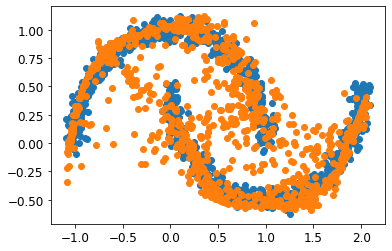

In [3]:
wgan = WGAN_Model.WGAN(n_features,latent_space,BATCH_SIZE,n_var,use_bias)
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)
wgan.generator.save('GANS/Models/GAN_'+str(j))
# plot loss
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'])
#ax.set_yscale('log')
ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/GANS_loss'+str(j)+'.png')
generator = keras.models.load_model('GANS/Models/GAN_'+str(j))
plt.close()

### Prediction

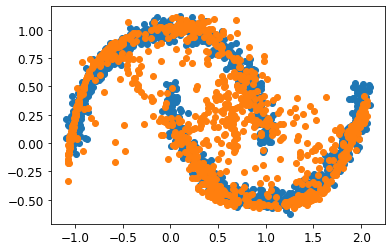

(1000, 2)

In [4]:
latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)
predicted_values = wgan.generator.predict(latent_values)
if scaled == '-1-1':
    predicted_values[:,:]=(predicted_values[:,:])
    predicted_values = scaler.inverse_transform(predicted_values)
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
plt.plot(X_train,y_train,'o')
plt.plot(predicted_values[:,0],predicted_values[:,1],'o')
plt.show()

np.shape(latent_values)

np.shape(predicted_values)

In [5]:
train_dataset

<BatchDataset shapes: (None, 2), types: tf.float32>

In [6]:
x_input = [-1, 0, 0.5, 1.5]
n_points = 80
y_min = -0.75
y_max = 1


# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//4, 2), x_input[0])
predict2 = np.full((n_points//4, 2), x_input[1])
predict3 = np.full((n_points//4, 2), x_input[2])
predict4 = np.full((n_points//4, 2), x_input[3])
predictthis = np.concatenate((predict1, predict2, predict3, predict4))

for n in range(n_points):
    predictthis[n,1] = random.uniform(y_min, y_max)
    
predictthis_scaled = scaler.transform(predictthis)
input_test = predictthis_scaled.reshape(-1, n_features).astype('float32')

print(input_test)



[[-9.3886364e-01  1.3465481e-01]
 [-9.3886364e-01 -1.3956319e-01]
 [-9.3886364e-01  1.8675619e-01]
 [-9.3886364e-01  3.4458303e-01]
 [-9.3886364e-01 -2.8959399e-01]
 [-9.3886364e-01 -2.7825460e-01]
 [-9.3886364e-01  2.2624834e-01]
 [-9.3886364e-01 -1.0697730e+00]
 [-9.3886364e-01 -1.0596154e+00]
 [-9.3886364e-01  6.9910276e-01]
 [-9.3886364e-01  8.6168908e-02]
 [-9.3886364e-01 -7.9289615e-01]
 [-9.3886364e-01  5.5112278e-01]
 [-9.3886364e-01  1.7940732e-02]
 [-9.3886364e-01 -5.3469557e-01]
 [-9.3886364e-01  6.0522717e-01]
 [-9.3886364e-01 -2.9499951e-01]
 [-9.3886364e-01 -9.1907513e-01]
 [-9.3886364e-01 -7.7050710e-01]
 [-9.3886364e-01  6.2693067e-02]
 [-3.1244946e-01 -4.7970992e-02]
 [-3.1244946e-01  3.9467007e-01]
 [-3.1244946e-01 -5.3190237e-01]
 [-3.1244946e-01 -7.5815761e-01]
 [-3.1244946e-01 -7.4064754e-02]
 [-3.1244946e-01 -9.7261477e-01]
 [-3.1244946e-01  5.2345818e-01]
 [-3.1244946e-01  3.4095907e-01]
 [-3.1244946e-01  7.2729629e-01]
 [-3.1244946e-01 -4.9981001e-01]
 [-3.12449

In [7]:
mse = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(1e-2)

def mse_loss(inp, outp):
    """
    Calculates the MSE loss between the x-coordinates
    """
    inp = tf.reshape(inp, [-1, n_features])
    outp = tf.reshape(outp, [-1, n_features])
    return mse(inp[:,0], outp[:,0])


def opt_step(latent_values, real_coding):
    """
    Minimizes the loss between generated point and inputted point
    """
    with tf.GradientTape() as tape:
        tape.watch(latent_values)
        gen_output = wgan.generator(latent_values, training=False)
        loss = mse_loss(real_coding, gen_output)

    gradient = tape.gradient(loss, latent_values)
    optimizer.apply_gradients(zip([gradient], [latent_values]))

    return loss

def optimize_coding(real_coding):
    """
    Optimizes the latent space values
    """
    latent_values = tf.random.normal([1, latent_space], mean=0.0, stddev=0.1)
    latent_values = tf.Variable(latent_values)

    loss = np.array()
    while 
#     for epoch in range(500):
        loss.append(opt_step(latent_values, real_coding).numpy())

    return latent_values

def predict(input_data, scaler, scaled):
    """
    Optimizes the latent space of the input then produces a prediction from
    the generator.
    """
    predicted_vals = np.zeros((1, n_features))

    for n in range(len(input_data)):
        print("Optimizing latent space for point ", n, " / ", len(input_data))
        real_coding = input_data[n].reshape(1, n_features)
        real_coding = tf.constant(real_coding)
        real_coding = tf.cast(real_coding, dtype=tf.float32)
        
        print(real_coding)

        latent_values = optimize_coding(real_coding)

        print(latent_values)
        #predicted_vals.append(scaler.inverse_transform(wgan.generator.predict(tf.convert_to_tensor(latent_values)).reshape(1,n_features)))
        predicted_vals_1 = scaler.inverse_transform((wgan.generator.predict(tf.convert_to_tensor(latent_values)).reshape(1, n_features)))
#         predicted_vals_1 = predicted_vals_1.reshape(1, self.n_features)
        predicted_vals = np.concatenate((predicted_vals, predicted_vals_1), axis=0)
    
    predicted_vals = predicted_vals[1:,:]

    
    return predicted_vals

In [8]:
X_generated = predict(input_test, scaler, scaled)

Optimizing latent space for point  0  /  80
tf.Tensor([[-0.93886364  0.1346548 ]], shape=(1, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[-0.08784307,  0.08101591, -0.19006869]], dtype=float32)>
Optimizing latent space for point  1  /  80
tf.Tensor([[-0.93886364 -0.13956319]], shape=(1, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[ 0.4210898 , -0.31945622, -0.2521387 ]], dtype=float32)>
Optimizing latent space for point  2  /  80
tf.Tensor([[-0.93886364  0.1867562 ]], shape=(1, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[ 0.23591192, -0.4030444 , -0.55451506]], dtype=float32)>
Optimizing latent space for point  3  /  80
tf.Tensor([[-0.93886364  0.34458303]], shape=(1, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[ 0.40002584, -0.39675996, -0.29457673]], dtype=float32)>
Optimizing latent space for point  4  /  80
tf.Tenso

<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[ 0.14883128,  0.16369218, -0.5478373 ]], dtype=float32)>
Optimizing latent space for point  36  /  80
tf.Tensor([[-0.31244946 -0.31005424]], shape=(1, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[ 0.28027415,  0.16251945, -0.4224368 ]], dtype=float32)>
Optimizing latent space for point  37  /  80
tf.Tensor([[-0.31244946 -1.020296  ]], shape=(1, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[ 0.05923042, -0.39606062, -0.20031527]], dtype=float32)>
Optimizing latent space for point  38  /  80
tf.Tensor([[-0.31244946 -0.6759623 ]], shape=(1, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[-0.11990955,  0.16195701, -0.309357  ]], dtype=float32)>
Optimizing latent space for point  39  /  80
tf.Tensor([[-0.31244946  0.66054523]], shape=(1, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(1, 3) dtype=flo

<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[0.12540574, 0.16421314, 0.37237495]], dtype=float32)>
Optimizing latent space for point  71  /  80
tf.Tensor([[0.6271718 0.2015809]], shape=(1, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[-0.42109966,  0.4982485 ,  0.06364436]], dtype=float32)>
Optimizing latent space for point  72  /  80
tf.Tensor([[ 0.6271718 -0.488801 ]], shape=(1, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[0.15557854, 0.17428502, 0.55784273]], dtype=float32)>
Optimizing latent space for point  73  /  80
tf.Tensor([[ 0.6271718 -0.9683244]], shape=(1, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[-0.00888507,  0.04370154,  0.19812502]], dtype=float32)>
Optimizing latent space for point  74  /  80
tf.Tensor([[ 0.6271718  -0.61461836]], shape=(1, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=ar

[[-1.98031723e-01  1.01182818e+00]
 [-1.09535635e+00 -5.34983218e-01]
 [-1.00000083e+00  9.06613171e-01]
 [-1.09506261e+00 -5.44654787e-01]
 [-9.99999881e-01  3.97095174e-01]
 [-9.96075690e-01  6.77879930e-01]
 [-1.00000000e+00  2.21523315e-01]
 [-1.09674537e+00 -3.47731769e-01]
 [-1.08967507e+00 -4.32374507e-01]
 [-2.00407773e-01  1.06695807e+00]
 [-1.00000000e+00  1.05876768e+00]
 [-9.99951422e-01  8.27943981e-01]
 [-1.00000000e+00 -2.23597080e-01]
 [-1.09310114e+00 -4.38991189e-01]
 [-1.99815124e-01  1.00601387e+00]
 [-1.94762021e-01  1.01017880e+00]
 [-1.09699619e+00 -5.12713611e-01]
 [-1.09508693e+00 -5.43043852e-01]
 [-1.91887274e-01  1.01512063e+00]
 [-1.09252000e+00 -3.68252933e-01]
 [-1.22319662e-07 -1.70350477e-01]
 [-2.83415534e-06  1.06986940e+00]
 [ 2.58288850e-07  1.11795747e+00]
 [-2.71675393e-08  1.09107471e+00]
 [ 2.68078484e-02  1.11597407e+00]
 [ 2.10712770e-07  1.09894800e+00]
 [ 5.91321339e-07  1.11860716e+00]
 [-2.17471808e-07  3.24156843e-02]
 [-5.50504240e-07  1

Text(6.625, 0.5, 'y')

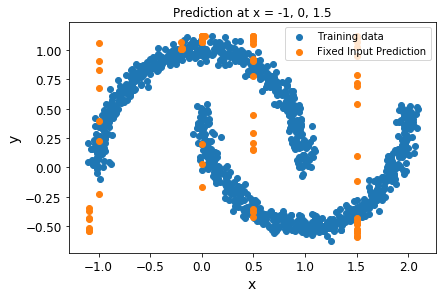

In [10]:
print(X_generated)
plt.title("Prediction at x = -1, 0, 1.5")
plt.scatter(X_train, y_train, label="Training data")
#plt.scatter(predictthis[:,0], predictthis[:,1], label="Sample data", c="pink")
plt.scatter(X_generated[:,0], X_generated[:,1], label="Fixed Input Prediction")
plt.legend(loc='upper right')
plt.tight_layout()
plt.xlabel("x")
plt.ylabel("y")